<a href="https://colab.research.google.com/github/abhayak759/AI-ML-Projects/blob/main/Plant-Pathology_2020FGVC7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abhay Kumar**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhaykumar121","key":"ac667a6c2e973d54835f53c7f3a094ea"}'}

In [ ]:
#create a kaggle folder
!mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c plant-pathology-2020-fgvc7

 99% 772M/779M [00:10<00:00, 59.8MB/s]
100% 779M/779M [00:10<00:00, 76.7MB/s]


In [ ]:
!unzip plant-pathology-2020-fgvc7

Archive:  plant-pathology-2020-fgvc7.zip
  inflating: images/Test_0.jpg       
  inflating: images/Test_1.jpg       
  inflating: images/Test_10.jpg      
  inflating: images/Test_100.jpg     
  inflating: images/Test_1000.jpg    
  inflating: images/Test_1001.jpg    
  inflating: images/Test_1002.jpg    
  inflating: images/Test_1003.jpg    
  inflating: images/Test_1004.jpg    
  inflating: images/Test_1005.jpg    
  inflating: images/Test_1006.jpg    
  inflating: images/Test_1007.jpg    
  inflating: images/Test_1008.jpg    
  inflating: images/Test_1009.jpg    
  inflating: images/Test_101.jpg     
  inflating: images/Test_1010.jpg    
  inflating: images/Test_1011.jpg    
  inflating: images/Test_1012.jpg    
  inflating: images/Test_1013.jpg    
  inflating: images/Test_1014.jpg    
  inflating: images/Test_1015.jpg    
  inflating: images/Test_1016.jpg    
  inflating: images/Test_1017.jpg    
  inflating: images/Test_1018.jpg    
  inflating: images/Test_1019.jpg    
  inflati

In [ ]:
import tensorflow
from tensorflow import keras


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dense, MaxPool2D, Activation, Dropout, Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
import os
import pandas as pd
import plotly.graph_objs as go
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train['image_id'] = train['image_id']+'.jpg'
test['image_id'] = test['image_id'] +'.jpg'

train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0.jpg,0,0,0,1
1,Train_1.jpg,0,1,0,0
2,Train_2.jpg,1,0,0,0
3,Train_3.jpg,0,0,1,0
4,Train_4.jpg,1,0,0,0


In [ ]:
img=[]
filename=train.image_id
for file in filename:
    image=cv2.imread("images/"+file)
    res=cv2.resize(image,(256,256))
    img.append(res)
img=np.array(img)

In [ ]:
img.shape

(1821, 256, 256, 3)

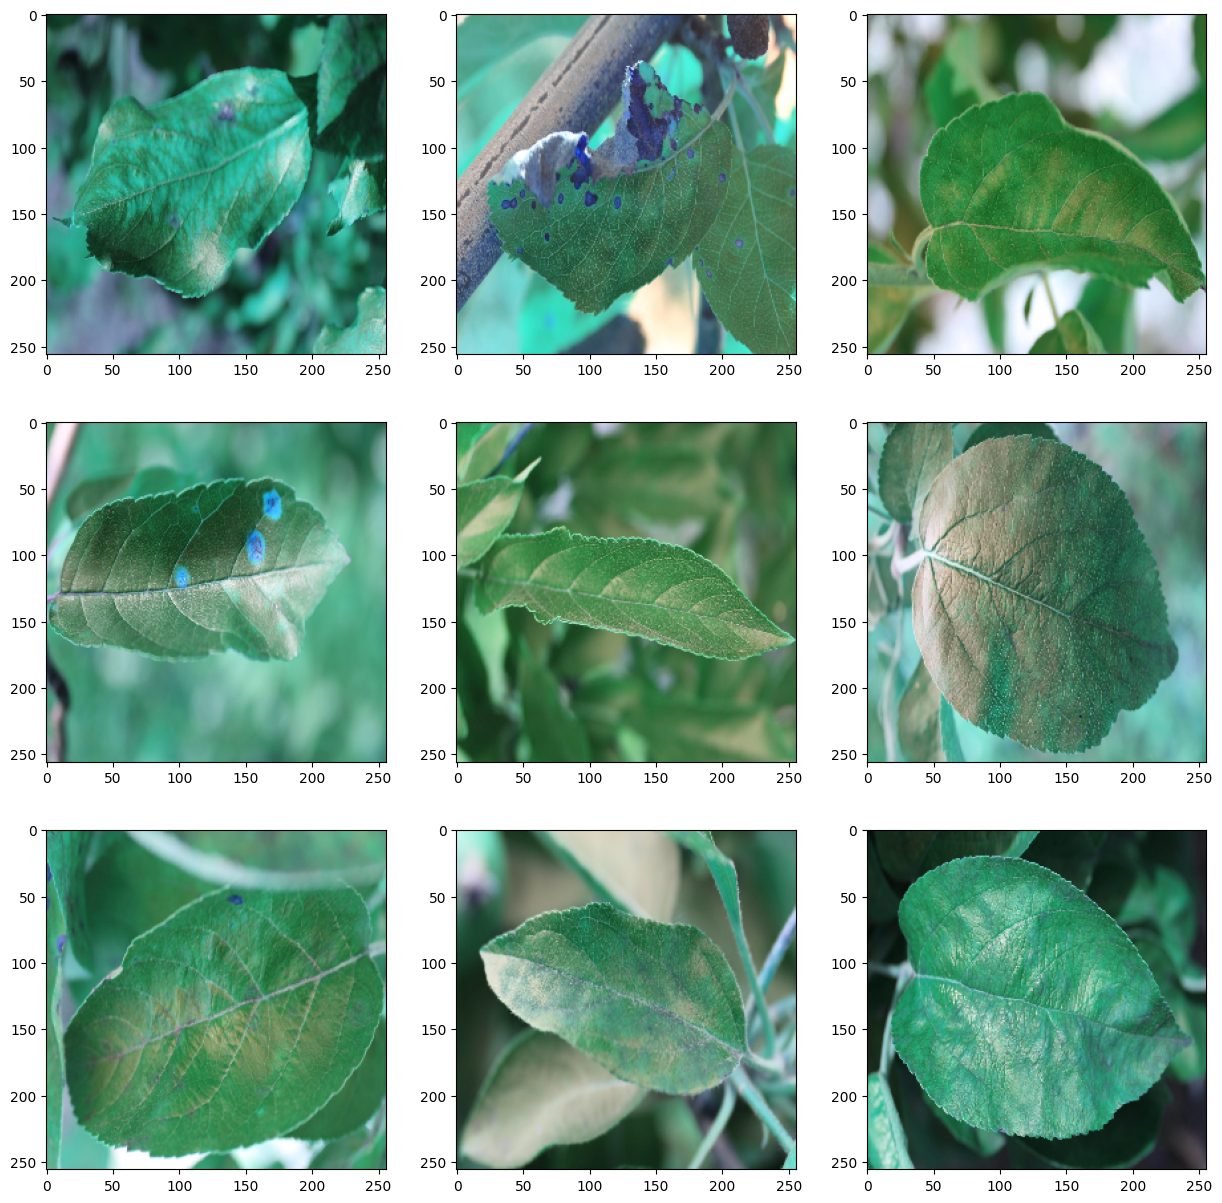

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(img[i])

In [ ]:
train_labels = np.float32(train.loc[:, 'healthy':'scab'].values)

In [ ]:
train_labels

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
train, val = train_test_split(train, test_size = 0.15)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    fill_mode='nearest',
    shear_range=0.1,
    rescale=1/255,
    brightness_range=[0.5, 1.5])

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
                train, directory = '/content/images',
                target_size = (128,128),
                x_col = 'image_id',
                y_col = ['healthy','multiple_diseases','rust','scab'],
                class_mode='raw',
                shuffle=False,
                subset='training',
                batch_size = 16
)

Found 1547 validated image filenames.


In [ ]:
val_generator=train_datagen.flow_from_dataframe(val,directory='/content/images',
                                                      target_size=(128,128),
                                                      x_col="image_id",
                                                      y_col=['healthy','multiple_diseases','rust','scab'],
                                                      class_mode='raw',
                                                      shuffle=False,
                                                      batch_size=16,
                                                  )

Found 274 validated image filenames.


In [ ]:
test_generator=train_datagen.flow_from_dataframe(test,directory='/content/images',
                                                      target_size=(128,128),
                                                      x_col="image_id",
                                                      y_col=None,
                                                      class_mode=None,
                                                      shuffle=False,
                                                      batch_size=16)

Found 1821 validated image filenames.


In [ ]:
from keras.applications.densenet import DenseNet121
from keras.models import Model
import keras
from keras import optimizers

import tensorflow as tf

In [ ]:
pretrained_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(128,128,3))

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),


    tf.keras.layers.Dense(4, activation='softmax')
    ])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss= tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['acc']

)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 4)                 4100      
                                                                 
Total params: 7041604 (26.86 MB)
Trainable params: 6957956 (26.54 MB)
Non-trainable params: 83648 (326.75 KB)
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau

In [ ]:
history_1 = model.fit_generator(train_generator,steps_per_epoch=20,
                               epochs=250, validation_data=val_generator,
                               validation_steps=100,
                               verbose = 1, callbacks=[ReduceLROnPlateau(monitor= 'loss', factor=0.3, patience=3, min_lr=0.000001)],
                                use_multiprocessing=False,
                               shuffle=True
                               )

<ipython-input-27-62b4e371b016>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_1 = model.fit_generator(train_generator,steps_per_epoch=20,


Epoch 1/250


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


20/20 [==============================] - ETA: 0s - loss: 1.4064 - acc: 0.5656

20/20 [==============================] - 86s 831ms/step - loss: 1.4064 - acc: 0.5656 - val_loss: 8.2589 - val_acc: 0.3431 - lr: 0.0010
Epoch 2/250
20/20 [==============================] - 8s 383ms/step - loss: 1.0714 - acc: 0.6438 - lr: 0.0010
Epoch 3/250
20/20 [==============================] - 6s 283ms/step - loss: 0.9065 - acc: 0.7250 - lr: 0.0010
Epoch 4/250
20/20 [==============================] - 10s 519ms/step - loss: 0.7142 - acc: 0.7619 - lr: 0.0010
Epoch 5/250
20/20 [==============================] - 7s 366ms/step - loss: 0.5436 - acc: 0.8219 - lr: 0.0010
Epoch 6/250
20/20 [==============================] - 6s 283ms/step - loss: 0.6175 - acc: 0.7875 - lr: 0.0010
Epoch 7/250
20/20 [==============================] - 7s 374ms/step - loss: 0.5396 - acc: 0.7906 - lr: 0.0010
Epoch 8/250
20/20 [==============================] - 6s 276ms/step - loss: 0.4941 - acc: 0.8254 - lr: 0.0010
Epoch 9/250
20/20 [==============================] - 6s 284ms/step - loss: 0.5400 - acc: 0.8156 - lr:

In [ ]:
SUB_PATH = "sample_submission.csv"

sub = pd.read_csv(SUB_PATH)
probs_RESNET = model.predict(test_generator, verbose=1)
sub.loc[:, 'healthy':] = probs_RESNET
sub.to_csv('submission.csv', index=False)
sub.head()

114/114 [==============================] - 37s 288ms/step


,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.000207,0.007403,0.991591,0.000798
1,Test_1,0.005404,0.023628,0.964738,0.006231
2,Test_2,0.000106,0.000821,0.000041,0.999032
3,Test_3,0.997538,0.000710,0.000708,0.001043
4,Test_4,0.000499,0.019589,0.978892,0.001020


In [ ]:
tf.keras.models.save_model(model, 'PlantPathology_model.hdf5')

<ipython-input-29-c8167927d621>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, 'PlantPathology_model.hdf5')
